In [1]:
%pylab inline
from numpy import fromfile, reshape

with open('seaside_matrix.bin', 'rb') as fid:
    dum=fromfile(fid,'int32',1)
    print dum
    m=int(fromfile(fid,'int32',1))
    print "m",m
    n=int(fromfile(fid,'int32',1))
    print "n",n
    x=fromfile(fid,'float32',m)
    print "x",x
    y=fromfile(fid,'float32',n)
    print "y",y
    z=reshape(fromfile(fid,'float32',m*n),(n,m))
    print z.shape

Populating the interactive namespace from numpy and matplotlib
[28640964]
m 3279
n 2182
x [10.853    10.863    10.873    ... 43.613    43.622997 43.633   ]
y [-13.261    -13.250999 -13.240999 ...   8.529      8.539      8.549   ]
(2182, 3279)


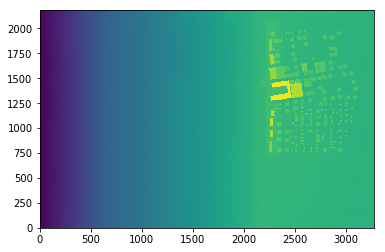

In [2]:
pcolormesh(z)

In [3]:
dx=x[1]-x[0]
xmax=x[-1]
xmin=x[0]


print xmax
print xmin
m_new=int(ceil( (xmax+dx)/dx ))
print m_new

x_new = arange(m_new, dtype='float')
x_new[-1] = xmax
print dx
print xmax
print m_new
print x_new[-1]
print x_new[m_new-1]
for i in range(m_new-1,0,-1):
    x_new[i-1]=x_new[i]-dx

print x_new[-5:-1]
print x_new[0:4]

43.633
10.853
4365
0.010000229
43.633
4365
43.632999420166016
43.632999420166016
[43.5929985  43.60299873 43.61299896 43.62299919]
[-0.00799942  0.00200081  0.01200104  0.02200127]


In [4]:
h_new=zeros((n,m_new), dtype='float')
count=0
for i in range(m_new-1,0,-1):
    if x_new[i]>=32.5:
        count=count+1
        h_new[:,i]=z[:,m-count]  # lidar data is only on the dry portion, where the model is
    elif x_new[i]>=17.5:
        h_new[:,i]=h_new[:,i+1]-dx/30
    elif x_new[i]>=10.0:
        h_new[:,i]=h_new[:,i+1]-dx/15
    else:
        h_new[:,i]=0.0
        
Z=h_new
x=x_new
y=y

X,Y = meshgrid(x,y)

print Z.shape
print X.shape
print Y.shape

(2182, 4365)
(2182, 4365)
(2182, 4365)


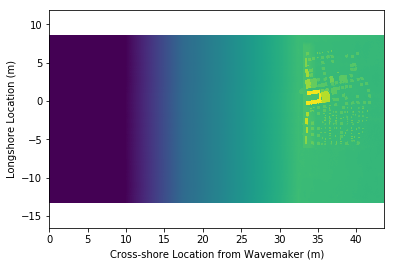

In [5]:
pcolormesh(X,Y,Z);
ylabel('Longshore Location (m)');
xlabel('Cross-shore Location from Wavemaker (m)');
#colormap(jet)
#colorbar
axis('equal');
#axis('tight');